# Creates Rule DataFrame

In [22]:
import pandas as pd

rules_df = pd.read_csv('Affiliation Rules.csv')

#cleans up file
rules_df = rules_df.reindex(columns = ['Terms', 'Exceptions', 'Affiliation'])
rules_df['Terms'] = rules_df['Terms'].apply(lambda x: x.lower())

In [23]:
#standardizes party affiliation -- republican = 0, democrat = 1
def party(x):
    
    aff = x['Affiliation']
    
    if aff == 'r':
        return 0
    else:
        return 1

rules_df['Affiliation'] = rules_df.apply(party, axis = 1)

In [24]:
rules_df

,Terms,Exceptions,Affiliation
0,trump 2020,Dump Trump 2020,0
1,vote blue,"why vote blue, if you vote blue, why would any...",1
2,vote red,"why vote red, if you vote red, why would anyon...",0
3,trump/pence 2020,NaN,0
4,trumpster,NaN,1
5,sleepy joe,NaN,0
6,maga,NaN,0
7,baby killer,NaN,0
8,veto sununu,NaN,1
9,#bidenharris2020,NaN,1


# Trains Rules on Labeled Data

In [25]:
import pandas as pd

users_df = pd.read_csv('Labeled.csv')

#standardizes messages -- lowercase, removes whitespace characters
users_df['Message'] = users_df['Message'].apply(lambda x: x.lower())
users_df['Message'] = users_df['Message'].apply(lambda x: " ".join(x.split()))

In [26]:
#counts frequency of republicans and democrats using each rule
def freq(x, party_aff):
    rule = x['Terms']
    sum_freq = 0
    
                            
    #makes exceptions lowercase -- standardizes
    try:
        exceptions = x['Exceptions'].lower().split(",")
    except:
        exceptions = None
        
    
    found_rules = list(users_df[users_df['Message'].str.contains(rule)].index)

    
    #iterates through all indices of entries containing rule
    for i in found_rules:
        message = users_df['Message'][i]
        user_aff = users_df['Party_Affiliation'][i]
        tot_rule = message.count(rule)
        tot = 0
         
        # case 1 -- rule has exceptions
        if exceptions:
            tot_exception = 0
            
            for excep in exceptions:
                exception_i = message.count(excep)
                tot_exception += exception_i
                
            #ignores exceptions
            if party_aff == user_aff:
                tot = tot_rule - tot_exception
          
        # case 2 -- all other rules
        else:
            if party_aff == user_aff:
                tot = tot_rule
                
        sum_freq += tot

        
    return sum_freq    

In [27]:
rules_df['Republican Usage'] = rules_df.apply(freq, args = (0,), axis = 1)
rules_df['Democrat Usage'] = rules_df.apply(freq, args = (1,), axis = 1)

In [28]:
rules_df

,Terms,Exceptions,Affiliation,Republican Usage,Democrat Usage
0,trump 2020,Dump Trump 2020,0,189,0
1,vote blue,"why vote blue, if you vote blue, why would any...",1,1,37
2,vote red,"why vote red, if you vote red, why would anyon...",0,40,0
3,trump/pence 2020,NaN,0,2,0
4,trumpster,NaN,1,0,12
5,sleepy joe,NaN,0,6,0
6,maga,NaN,0,2,1
7,baby killer,NaN,0,2,0
8,veto sununu,NaN,1,1,2
9,#bidenharris2020,NaN,1,0,1


In [29]:
#determines total times rule was used in dataset
def tot_usage(x):
    rep = x['Republican Usage']
    dem = x['Democrat Usage']
    
    return rep + dem

In [30]:
rules_df['Total Usage'] = rules_df.apply(tot_usage, axis = 1)

In [31]:
rules_df

,Terms,Exceptions,Affiliation,Republican Usage,Democrat Usage,Total Usage
0,trump 2020,Dump Trump 2020,0,189,0,189
1,vote blue,"why vote blue, if you vote blue, why would any...",1,1,37,38
2,vote red,"why vote red, if you vote red, why would anyon...",0,40,0,40
3,trump/pence 2020,NaN,0,2,0,2
4,trumpster,NaN,1,0,12,12
5,sleepy joe,NaN,0,6,0,6
6,maga,NaN,0,2,1,3
7,baby killer,NaN,0,2,0,2
8,veto sununu,NaN,1,1,2,3
9,#bidenharris2020,NaN,1,0,1,1


# Rule Analysis

In [32]:
#calculates rule's accuracy as a percentage
def percentage(x):
    rep = x['Republican Usage']
    dem = x['Democrat Usage']
    tot = x['Total Usage']
    aff = x['Affiliation']
    

    if rep > dem:
        percentage = (rep / tot) * 100
        
        if aff == 1:
            percentage = 100 - percentage
    elif dem > rep:
        percentage = (dem / tot) * 100
        
        if aff == 0:
            percentage = 100 - percentage
    elif rep == dem & rep != 0:
        percentage = 50    
    else:
        percentage = None

    if percentage != None:
        percentage = float('{0:.2f}'.format(percentage))
        
    
    return percentage

In [33]:
rules_df['Accuracy %'] = rules_df.apply(percentage, axis=1)

In [34]:
rules_df

,Terms,Exceptions,Affiliation,Republican Usage,Democrat Usage,Total Usage,Accuracy %
0,trump 2020,Dump Trump 2020,0,189,0,189,100.00
1,vote blue,"why vote blue, if you vote blue, why would any...",1,1,37,38,97.37
2,vote red,"why vote red, if you vote red, why would anyon...",0,40,0,40,100.00
3,trump/pence 2020,NaN,0,2,0,2,100.00
4,trumpster,NaN,1,0,12,12,100.00
5,sleepy joe,NaN,0,6,0,6,100.00
6,maga,NaN,0,2,1,3,66.67
7,baby killer,NaN,0,2,0,2,100.00
8,veto sununu,NaN,1,1,2,3,66.67
9,#bidenharris2020,NaN,1,0,1,1,100.00


Text(0.5, 1.0, 'Term Accuracy')

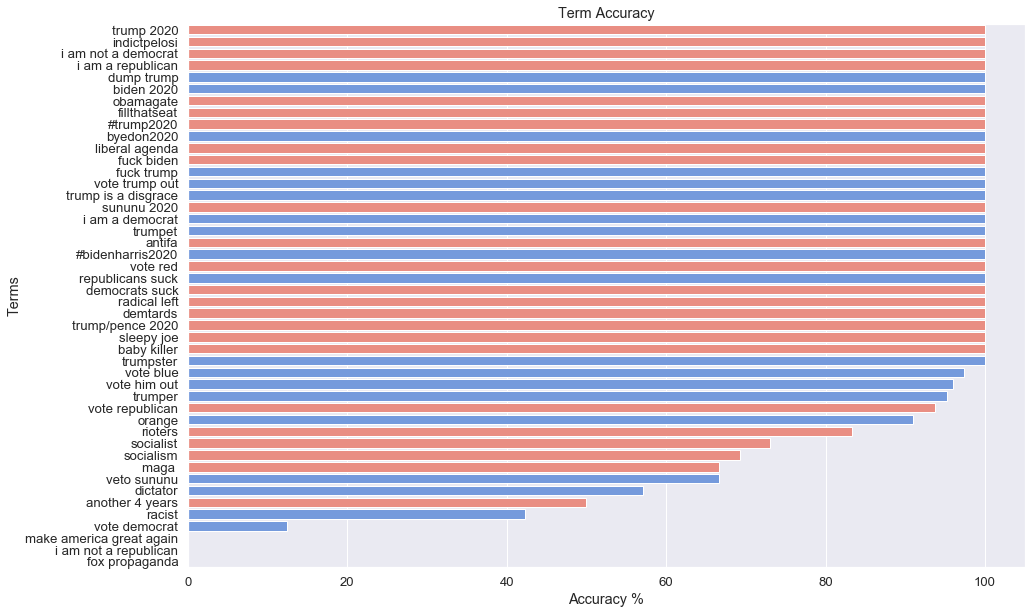

In [35]:
from pandas import Series
import seaborn as sns
import matplotlib.pyplot as plt

#values to be plotted
term = Series(rules_df['Terms'])
accuracy = Series(rules_df['Accuracy %'])
descending = rules_df.sort_values('Accuracy %', ascending = False).Terms

#color-codes based on rules' affiliation
#retrieves index of respective descending value and checks its affiliation
colors = ('salmon' if rules_df.at[descending[descending == i].index[0], 'Affiliation'] == 0 else 'cornflowerblue' for i in descending)

plt.figure(figsize = (15,10))
sns.set(font_scale = 1.2)
sns.barplot(x = accuracy, y = term, orient = 'h', data = rules_df, order = descending, palette = colors).set_title('Term Accuracy')

Text(0.5, 1.0, 'Term Frequency')

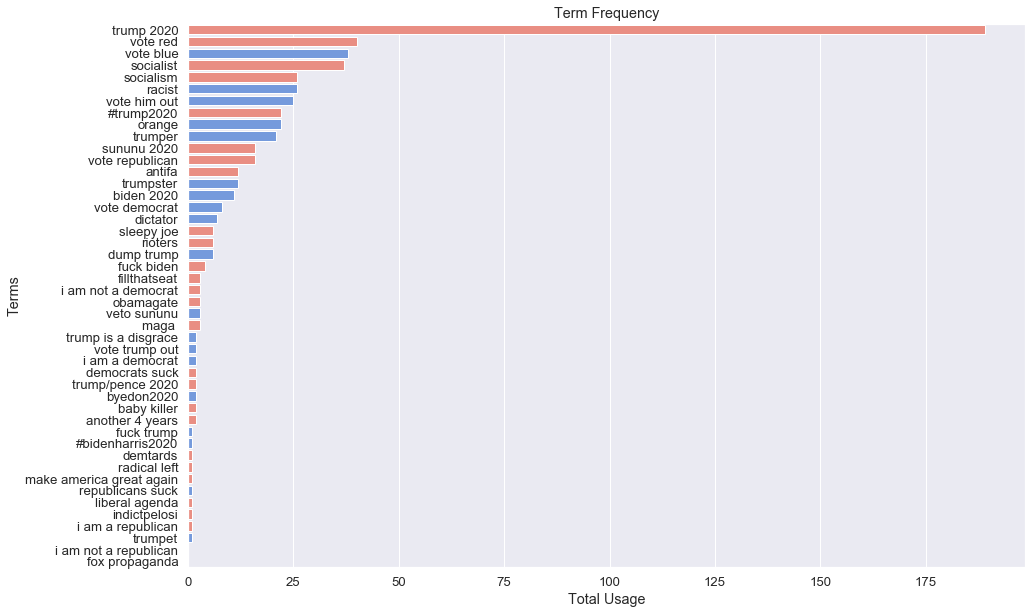

In [36]:
#values to be plotted
term = Series(rules_df['Terms'])
total = Series(rules_df['Total Usage'])
descending = rules_df.sort_values('Total Usage', ascending = False).Terms

#color-codes based on rules' affiliation
#retrieves index of respective descending value and checks its affiliation
colors = ('salmon' if rules_df.at[descending[descending == i].index[0], 'Affiliation'] == 0 else 'cornflowerblue' for i in descending)

plt.figure(figsize = (15,10))
sns.set(font_scale = 1.2)
sns.barplot(x = total, y = term, orient = 'h', data = rules_df, order = descending, palette = colors).set_title('Term Frequency')

# Export Rule Analysis Data

In [37]:
rules_df.to_csv('Rule Analysis.csv')